# Steps To be Performed:-
- Load the Data
- Do EDA on the dataset
- Text Pre-Processing
- Model Building
- Model Evalution
- Model Deployment


Twitter Semtiment  Dataset
- data pre-processing
- Train Test Split
- Logistic Regression




New Data -->
- Trained Logistic Regression Moldel
- Positive Tweet (or) Negative Tweet Prediction

**Sentiment analysis with tweets**

- This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api .
- The tweets have been annotated (0 = negative, 1 = positive) and they can be used to detect sentiment .

In [ ]:
#installing kaggle Library
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Importing the Kaggle File**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Importing the Twitter Sentiment Analysis**

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
100% 80.9M/80.9M [00:03<00:00, 32.6MB/s]
100% 80.9M/80.9M [00:03<00:00, 22.4MB/s]


In [ ]:
!ls


Lemmtized_data_SentimentAnlaysis.csv  sample_data  sentiment140.zip


In [ ]:
# Extracting the Compressed Dataset

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done ! Extracted')

Done ! Extracted


### **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punket')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading punket: Package 'punket' not found in index


False

In [ ]:
##Libraries for text Preoprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

**Data Processing**

In [ ]:
## Loading the Data From CSV File to pandas DataFrame

data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding = 'latin-1' )

In [ ]:
#head()
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#naming the Columns and reading the Data set again ,

columns_names = ['target','id','date','flag','user','tweet']
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding = 'latin-1',names = columns_names)

In [ ]:
## checking the shape
data.shape

(1600000, 6)

In [ ]:
## Printing the 5 cols
data.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
## Counting the number of missing values
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [ ]:
data.shape

(1600000, 6)

In [ ]:
data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

**Covert the target "4" to "1"**

In [ ]:
data.replace({'target':{4:1}},inplace =True)

In [ ]:
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0 --> Negative Tweet

1 --> Postive Tweet

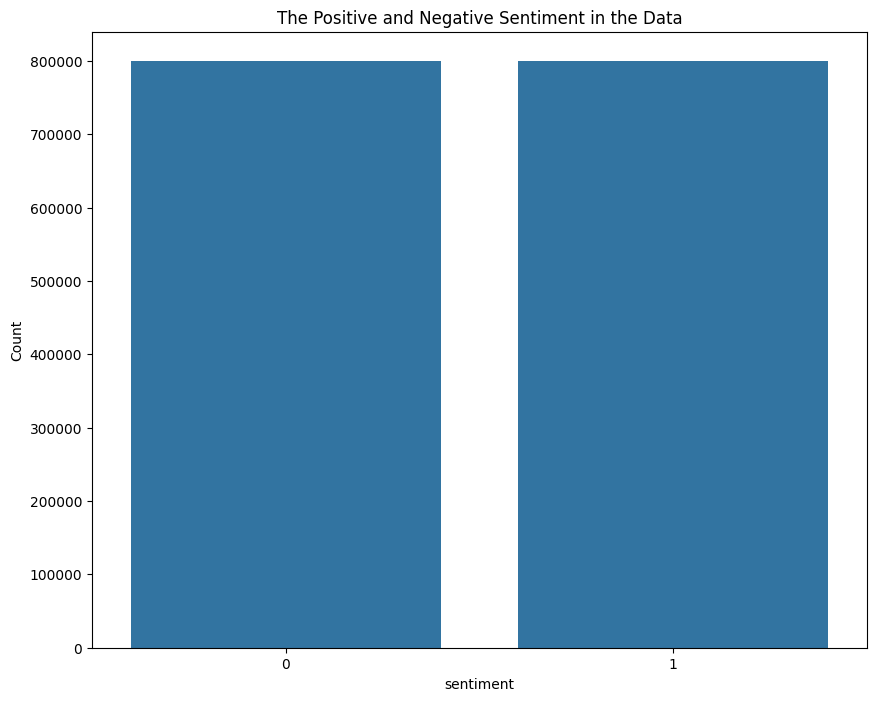

In [ ]:
##Distribution of the target variabel
plt.figure(figsize = (10,8))
sns.countplot(x ='target',data = data)
plt.title('The Positive and Negative Sentiment in the Data')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
data['user'].value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: count, Length: 659775, dtype: int64

### **Perform the Text Preprocessing**

In [ ]:
positive_tweets = data[data['target'] == 1]['tweet']
negative_tweets = data[data['target'] == 0]['tweet']


In [ ]:
positive_tweets.value_counts().sum()

800000

In [ ]:
negative_tweets.value_counts().sum()

800000

In [ ]:
data.shape

(1600000, 6)

In [ ]:
#Lemmatization Function
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

**Lemmatization**

- Lemmatization tries to find the root word based on the word's meaning and its part of speech.
- This helps maintain the original word's semantic content.

In [ ]:
def text_preprocessing(content):
  content = re.sub('[^a-zA-Z]',' ',content) #expect alphabets rplace all with space
  content = content.lower()
  content = content.split()
  content = [lemmatizer.lemmatize(word) for word in content if word not in stopwords.words('english')]
  return ' '.join(content)

In [ ]:
data['Lemmatized_content'] = data['tweet'].apply(text_preprocessing)

In [ ]:
data.head()

,target,id,date,flag,user,tweet,Lemmatized_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


In [ ]:
data['Lemmatized_content']

0          switchfoot http twitpic com zl awww bummer sho...
1          upset update facebook texting might cry result...
2          kenichan dived many time ball managed save res...
3                            whole body feel itchy like fire
4                           nationwideclass behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interview http b...
1599997                       ready mojo makeover ask detail
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: Lemmatized_content, Length: 1600000, dtype: object

In [ ]:
lemmtized_data = data #saving the prevsly created content

In [ ]:
lemmtized_data.to_csv('Lemmtized_data_SentimentAnlaysis.csv',index = False)

In [ ]:
l_df = pd.read_csv('/content/Lemmtized_data_SentimentAnlaysis.csv')
l_df.head()

,target,id,date,flag,user,tweet,Lemmatized_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


In [ ]:
l_df.shape

(1600000, 7)

In [ ]:
##data = l_df ##

**Model Bulding**

In [ ]:

#Separate the Data and labels
X = data['Lemmatized_content'].values
y = data['target'].values

In [ ]:
pd.DataFrame(X)

,0
0,switchfoot http twitpic com zl awww bummer sho...
1,upset update facebook texting might cry result...
2,kenichan dived many time ball managed save res...
3,whole body feel itchy like fire
4,nationwideclass behaving mad see
...,...
1599995,woke school best feeling ever
1599996,thewdb com cool hear old walt interview http b...
1599997,ready mojo makeover ask detail
1599998,happy th birthday boo alll time tupac amaru sh...


In [ ]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1599995,1
1599996,1
1599997,1
1599998,1


In [ ]:
print(data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


- **Splitting the data to Training and Test Data**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state= 54)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(X_train)


['lindseyrainbow save one'
 'thre end nfight iughhh fuckkkkk thissssssss http twitpic com bbyj'
 'hanseong haha exactly' ...
 'wish brace got tightened often one week teeth stop moving wait week get done'
 'wendym heee funny wendell' 'voted teen choice award']


In [ ]:
print(X_test)

['found note computer bag make trip way better understand people kid travel regular basis xo'
 'colemsprouse think dylan live webcast sometime sooo awesome'
 'nyxed hope get le sneezy soon' ...
 'caigriffiths poor thing rub bio oil coco butter regularly fade scar x'
 'kt writes ha good luck kid week'
 'thank soph mak news listen ricky grevais podcast train want laugh much']


In [ ]:
## Converting the textual Data to numerical values

vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)

X_test_transformed = vectorizer.transform(X_test)



In [ ]:
print(X_train_transformed)

  (0, 323732)	0.25998812730271087
  (0, 381427)	0.44909929189786546
  (0, 253899)	0.8548192789581113
  (1, 37677)	0.4083726861854635
  (1, 84643)	0.1259301059604099
  (1, 453228)	0.15179112686421864
  (1, 185659)	0.11719610843877247
  (1, 438024)	0.4083726861854635
  (1, 152248)	0.3475521051010346
  (1, 200858)	0.4083726861854635
  (1, 309961)	0.4083726861854635
  (1, 129906)	0.17812768683636782
  (1, 438613)	0.3574509651934629
  (2, 135873)	0.44768326813916925
  (2, 170939)	0.29175713926426206
  (2, 172881)	0.8452558565999804
  (3, 371001)	0.23549158660893024
  (3, 91263)	0.3715056897075709
  (3, 401865)	0.39448998529519735
  (3, 255269)	0.16519435716192818
  (3, 242883)	0.3635311172807452
  (3, 420116)	0.2808937424544628
  (3, 54746)	0.20420750330465828
  (3, 357222)	0.35724961936786265
  (3, 488681)	0.16650438940563986
  :	:
  (1279996, 304809)	0.3916386226017901
  (1279996, 234892)	0.5174331603898744
  (1279996, 438140)	0.24817120734253223
  (1279996, 470741)	0.20673098048346827
  

In [ ]:
print(X_test_transformed)

  (0, 485072)	0.2827705456218798
  (0, 471181)	0.18733168681380497
  (0, 457776)	0.2654232264756267
  (0, 448669)	0.2437547800219026
  (0, 447406)	0.2946701254267945
  (0, 362376)	0.3192981954444304
  (0, 335366)	0.19422919104998104
  (0, 316269)	0.2733918815016337
  (0, 267933)	0.17571204465101045
  (0, 233489)	0.2285344840497479
  (0, 148697)	0.2259046368919778
  (0, 85586)	0.24105292454716581
  (0, 43061)	0.19026256193061825
  (0, 36549)	0.38572983414050993
  (0, 34099)	0.27677130973434794
  (1, 471869)	0.4400484602255075
  (1, 437554)	0.18522692586696082
  (1, 405129)	0.26323822109029704
  (1, 404514)	0.3299539396007315
  (1, 255679)	0.24320421074730383
  (1, 121458)	0.3923502139894072
  (1, 84023)	0.5765079793824665
  (1, 31130)	0.22008168131809847
  (2, 405086)	0.2611305891077743
  (2, 402531)	0.5615628202000341
  :	:
  (319997, 344197)	0.1995070359128923
  (319997, 321856)	0.28832982383398237
  (319997, 138097)	0.33043950012670126
  (319997, 83199)	0.3143753507776044
  (319997, 

In [ ]:
import pickle
pickle.dump(vectorizer,open('tfidf_sentiment_analysis.sav', 'wb'))

**Training the MAchine Learning Model**

**Logistic Regression Classifier**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_transformed,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Model Evaluation**

**Accuracy Score**

In [ ]:
# Accuracy Score on training data

X_train_pred = model.predict(X_train_transformed)
training_data_accuracy = accuracy_score(X_train_pred,y_train)


In [ ]:
print("Accuracy Score on the Training data:-",training_data_accuracy)


Accuracy Score on the Training data:- 0.805315625


In [ ]:
## Accuracy Score on test Data

X_test_pred = model.predict(X_test_transformed)

test_data_accuracy = accuracy_score(X_test_pred,y_test)


In [ ]:
print("Accuracy Score on the Test data:-",test_data_accuracy)

Accuracy Score on the Test data:- 0.78041875


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, X_test_pred))
print("Classification Report:")
print(classification_report(y_test, X_test_pred))



Confusion Matrix:
[[122033  37967]
 [ 32299 127701]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



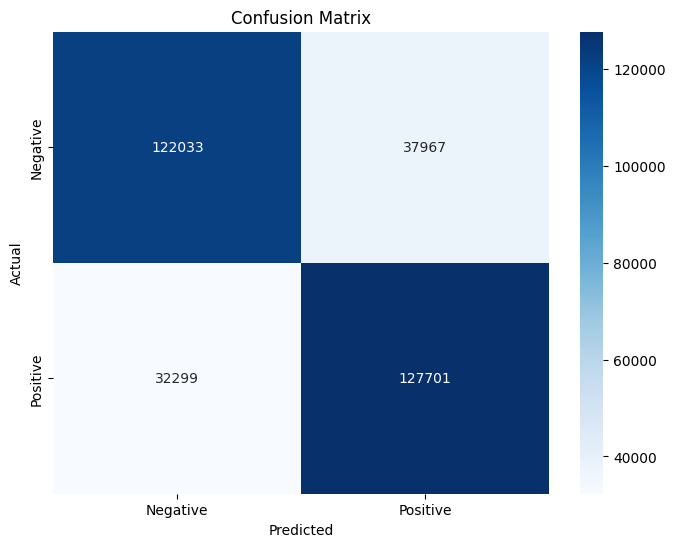

In [ ]:
# Visualizing Confusion Matrix
conf_matrix = confusion_matrix(y_test, X_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### **Saving the Trained Model**

In [ ]:
import pickle

In [ ]:
filename = 'twitter_trained_model.sav'

pickle.dump(model,open(filename,'wb'))


### **Loading the  Saved  Model**



In [ ]:
loaded_model = pickle.load(open('/content/twitter_trained_model.sav','rb'))

In [ ]:
X_new = X_test_transformed[200]
print(y_test[200])

prediction = model.predict(X_new)
print(prediction)


if(prediction[0] == 0):
  print('Negative Tweet')
else:
  print('Positive Tweet')




0
[1]
Positive Tweet


In [ ]:
# New input text
X_new_1 = "@Hackediphone goodnite u guys! Have a great weekend!"
print("Original Text:", X_new_1)

print('-----'*25)
X_new_1_preprocessed = text_preprocessing(X_new_1)
print("Preprocessed Text:", X_new_1_preprocessed)

# Transform the preprocessed text using the TF-IDF vectorizer
transformed_text = vectorizer.transform([X_new_1_preprocessed])
print("Transformed Text Shape:", transformed_text.shape)
print('-----'*25)
# Predict the sentiment using the loaded model
prediction = loaded_model.predict(transformed_text)
print("Prediction:", prediction[0])

# Display the prediction result
if prediction[0] == 0:
    print('Negative Tweet')
else:
    print('Positive Tweet')


Original Text: @Hackediphone goodnite u guys! Have a great weekend!
-----------------------------------------------------------------------------------------------------------------------------
Preprocessed Text: hackediphone goodnite u guy great weekend
Transformed Text Shape: (1, 496726)
-----------------------------------------------------------------------------------------------------------------------------
Prediction: 1
Positive Tweet
